This quick tutorial show you how to download the YSE DR1 data (full sample, spec sample, phot sample), 
how to grab metadata, and how to recreate a plot from the paper.

## YSE DR1 paper on [arXiv](https://arxiv.org/pdf/2211.07128.pdf)

### Download YSE DR1 from [Zenodo](https://zenodo.org/record/7317476#.Y5OeqC1h3PA)

In [1]:
# Download the data with S/N > 4. The same used in Aleo et al (2022)

!wget https://zenodo.org/record/7317476/files/yse_dr1_zenodo_snr_geq_4.tar.gz

--2022-12-09 15:29:15--  https://zenodo.org/record/7317476/files/yse_dr1_zenodo_snr_geq_4.tar.gz
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1761886 (1.7M) [application/octet-stream]
Saving to: ‘yse_dr1_zenodo_snr_geq_4.tar.gz’

yse_dr1_zenodo_snr_ 100%[===================>]   1.68M  2.31MB/s    in 0.7s    

2022-12-09 15:29:17 (2.31 MB/s) - ‘yse_dr1_zenodo_snr_geq_4.tar.gz’ saved [1761886/1761886]



In [2]:
# Unpack the files

!gunzip yse_dr1_zenodo_snr_geq_4.tar.gz
!tar -xf yse_dr1_zenodo_snr_geq_4.tar

In [3]:
# Import custom file for parsing data into:
# list of SN names, list of dicts (SN metadata), and list of dataframes (SN photometry)
from read_yse_ztf_snana_dir import read_YSE_ZTF_snana_dir
# Read in YSE DR1 data
full_snid_list, full_meta_list, full_df_list = read_YSE_ZTF_snana_dir(dir_name='yse_dr1_zenodo_snr_geq_4')

# Other useful imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import random
from math import nan, isnan
import itertools
from collections import Counter

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

# Make plots nice on Mac
%config InlineBackend.figure_format = 'retina'

In [4]:
# Other useful functions

def get_param(meta_list, param):
    param_list = []
    
    for sn in meta_list:
        if param == 'peak_abs_mag':
            print(sn['object_id'], sn['transient_spec_class'])
            try: param_list.append(float(sn[param]))
            except: continue
        
        else: 
            try:
                param_list.append(sn[param])
            except: print(f"WARNING: {param} not in parameter list. Check!")
            
    return param_list 

def get_SNclass_param(meta_list, param, ifstr, ifprint=False):
    all_list, snII_list, snIa_list, snIbc_list, other_list = [], [], [], [], []
    
    for spec_sn in meta_list:
        
        if ifstr==True:
            try: all_list.append(str(spec_sn[param]))
            except: continue
                
            if spec_sn[param] == 'SNII':
                snII_list.append(str(spec_sn[param]))

            elif spec_sn[param] == 'SNIa':
                snIa_list.append(str(spec_sn[param]))

            elif spec_sn[param] == 'SNIbc':
                snIbc_list.append(str(spec_sn[param]))

            else: 
                if ifprint==True: print(spec_sn[param])
                other_list.append(str(spec_sn[param]))
                
        else:
            try: all_list.append(float(spec_sn[param]))
            except: continue

            if spec_sn['spectype_3class'] == 'SNII':
                snII_list.append(float(spec_sn[param]))

            elif spec_sn['spectype_3class'] == 'SNIa':
                snIa_list.append(float(spec_sn[param]))

            elif spec_sn['spectype_3class'] == 'SNIbc':
                snIbc_list.append(float(spec_sn[param]))

            else: 
                if ifprint==True: print(spec_sn['spectype_3class'])
                other_list.append(float(spec_sn[param]))
        
            
    return all_list, snII_list, snIa_list, snIbc_list, other_list

In [5]:
spectype_3class_l = get_param(meta_list=full_meta_list, param='spectype_3class')

# Separate for spec and phot data to make some analyis easier

# Get indices of Spec, Phot Sne
spec_idx_l, phot_idx_l = [],[]
for i, cls in enumerate(spectype_3class_l):
    if cls != 'NA':
        spec_idx_l.append(i)
    elif cls == 'NA':
        phot_idx_l.append(i)
    else: print("AHH!")
        
# Spectroscopic SNe only
spec_snid_list = [full_snid_list[i] for i in spec_idx_l]
spec_meta_list = [full_meta_list[i] for i in spec_idx_l]
spec_df_list = [full_df_list[i] for i in spec_idx_l]

# Photometric SNe only
phot_snid_list = [full_snid_list[i] for i in phot_idx_l]
phot_meta_list = [full_meta_list[i] for i in phot_idx_l]
phot_df_list = [full_df_list[i] for i in phot_idx_l]

### Exploring the data

In [6]:
# list of SN names

full_snid_list[0:3]

['2019lbi', '2019pmd', '2019ppi']

In [7]:
# list of dicts (SN metadata)
full_meta_list[0:3]

[{'object_id': '2019lbi',
  'original_object_id': '2019lbi',
  'ra': 190.088004,
  'dec': 1.273998,
  'mwebv': 0.015,
  'redshift': 0.013,
  'redshift_err': 0.005,
  'redshift_type': 'SPEC-Z',
  'redshift_frame': 'HELIO',
  'photo_z': 0.038,
  'photoz_err': 0.012,
  'sn_offset': 14.831,
  'host_gal_name': 'WISEA J124020.15+011624.2',
  'host_gal_name_source': '(NED)',
  'host_gal_z': 0.0158,
  'host_gal_z_err': 0.005,
  'host_gal_z_type': 'HOST-Z',
  'host_gal_z_frame': 'HELIO',
  'peakmjd': 58676.172,
  'host_logmass': -99.0,
  'peak_abs_mag': -16.708,
  'transient_spec_class': 'SNII',
  'spectype_3class': 'SNII',
  'parsnip_pred_class': 'SNIa',
  'parsnip_pred_conf': '49.7',
  'parsnip_s1': -0.063,
  'parsnip_s1_err': 0.127,
  'parsnip_s2': 0.758,
  'parsnip_s2_err': 0.273,
  'parsnip_s3': -0.112,
  'parsnip_s3_err': 0.124,
  'superraenn_pred_class': 'SNII',
  'superraenn_pred_conf': '91.7',
  'ztf_zeropoint': 27.5,
  'peakSNR': 61.164,
  'max_mjd_gap': 23.018,
  'nobs_before_peak': 

In [8]:
# ist of dataframes (SN photometry)
full_df_list[0:3]

[          MJD PASSBAND       FLUX  FLUXERR     MAG  MAGERR PHOTFLAG
 0   58676.172        X  15240.973  258.852  17.042   0.018     0x00
 1   58676.192        Y  14246.757  232.926  17.116   0.018     0x00
 2   58679.187        X  14460.171  311.803  17.100   0.023     0x00
 3   58679.191        Y  13726.576  295.383  17.156   0.023     0x00
 4   58797.545        Y   6190.193  240.414  18.021   0.042     0x00
 ..        ...      ...        ...      ...     ...     ...      ...
 88  59032.280        z    618.992   98.058  20.521   0.172     0x00
 89  59039.300        r    553.884   83.581  20.641   0.164     0x00
 90  59041.280        r    583.879   81.826  20.584   0.152     0x00
 91  59041.280        z    519.282  103.647  20.711   0.217     0x00
 92  59048.280        r    497.846   59.789  20.757   0.130     0x00
 
 [93 rows x 7 columns],
           MJD PASSBAND       FLUX  FLUXERR     MAG  MAGERR PHOTFLAG
 0   58725.462        X   1094.346   78.982  19.902   0.078     0x00
 1   587

### Recreate a figure from the paper:

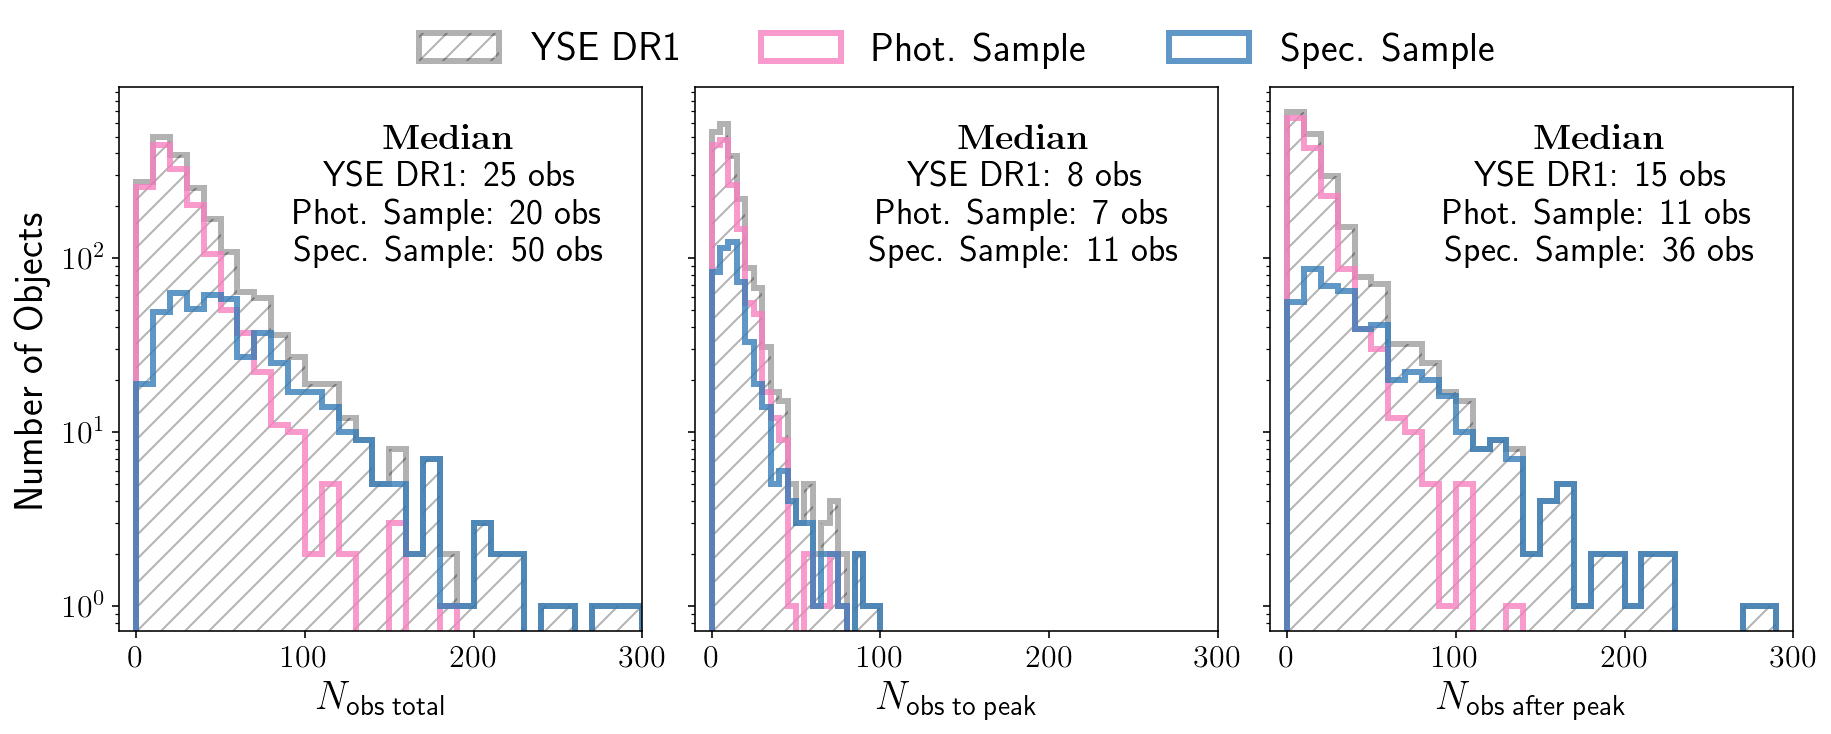

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharey=True, sharex=True)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
ntot_bins = np.linspace(0, 350, 36)
to_bins = np.linspace(0, 125, 26)
after_bins = np.linspace(0, 300, 31)

spec_nobs_total_list = get_param(meta_list=spec_meta_list, param='num_points')
phot_nobs_total_list = get_param(meta_list=phot_meta_list, param='num_points')
spec_nobs_to_peak_list = get_param(meta_list=spec_meta_list, param='nobs_to_peak')
phot_nobs_to_peak_list = get_param(meta_list=phot_meta_list, param='nobs_to_peak')
spec_nobs_after_peak_list = get_param(meta_list=spec_meta_list, param='nobs_after_peak')
phot_nobs_after_peak_list = get_param(meta_list=phot_meta_list, param='nobs_after_peak')


median_dr1_nobs_total = int(np.median(spec_nobs_total_list+phot_nobs_total_list))
median_phot_nobs_total = int(np.median(phot_nobs_total_list))
median_spec_nobs_total = int(np.median(spec_nobs_total_list))
ax1.hist(spec_nobs_total_list+phot_nobs_total_list, bins=ntot_bins, color='black', histtype='step', linewidth=3, alpha=0.3,
         fill=False, label=r'YSE DR1', hatch='//')
ax1.hist(phot_nobs_total_list, bins=ntot_bins, color='#f781bf', histtype='step', linewidth=3, alpha=0.8,
         fill=False, label=r'Phot. Sample')
ax1.hist(spec_nobs_total_list, bins=ntot_bins, color='#377eb8', histtype='step', linewidth=3, alpha=0.8,
         fill=False, label=r'Spec. Sample')



median_dr1_nobs_to_peak = int(np.median(spec_nobs_to_peak_list+phot_nobs_to_peak_list))
median_phot_nobs_to_peak = int(np.median(phot_nobs_to_peak_list))
median_spec_nobs_to_peak = int(np.median(spec_nobs_to_peak_list))
ax2.hist(spec_nobs_to_peak_list+phot_nobs_to_peak_list, bins=to_bins, color='black', histtype='step', linewidth=3, alpha=0.3,
         fill=False, label=r'YSE DR1', hatch='//')
ax2.hist(phot_nobs_to_peak_list, bins=to_bins, color='#f781bf', histtype='step', linewidth=3, alpha=0.8,
         fill=False, label=r'Phot. Sample')
ax2.hist(spec_nobs_to_peak_list , bins=to_bins, color='#377eb8', histtype='step', linewidth=3, alpha=0.8,
         fill=False, label=r'Spec. Sample')


median_dr1_nobs_after_peak = int(np.median(spec_nobs_after_peak_list+phot_nobs_after_peak_list))
median_phot_nobs_after_peak = int(np.median(phot_nobs_after_peak_list))
median_spec_nobs_after_peak = int(np.median(spec_nobs_after_peak_list))
ax3.hist(spec_nobs_after_peak_list+phot_nobs_after_peak_list, bins=after_bins, color='black', histtype='step', linewidth=3, alpha=0.3,
         fill=False, label=r'YSE DR1', hatch='//')
ax3.hist(phot_nobs_after_peak_list, bins=after_bins, color='#f781bf', histtype='step', linewidth=3, alpha=0.8,
         fill=False, label=r'Phot. Sample')
ax3.hist(spec_nobs_after_peak_list, bins=after_bins, color='#377eb8', histtype='step', linewidth=3, alpha=0.8,
         fill=False, label=r'Spec. Sample')


# hide tick and tick label of the big axis
ax1.text(0.63, 0.8, r'$\bf{Median}$' + f'\n YSE DR1: {median_dr1_nobs_total} obs\n Phot. Sample: {median_phot_nobs_total} obs\n Spec. Sample: {median_spec_nobs_total} obs', 
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=ax1.transAxes,
         fontsize=18)
ax2.text(0.63, 0.8, r'$\bf{Median}$' + f'\n YSE DR1: {median_dr1_nobs_to_peak} obs\n Phot. Sample: {median_phot_nobs_to_peak} obs\n Spec. Sample: {median_spec_nobs_to_peak} obs', 
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=ax2.transAxes,
         fontsize=18)
ax3.text(0.63, 0.8, r'$\bf{Median}$' + f'\n YSE DR1: {median_dr1_nobs_after_peak} obs\n Phot. Sample: {median_phot_nobs_after_peak} obs\n Spec. Sample: {median_spec_nobs_after_peak} obs', 
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=ax3.transAxes,
         fontsize=18)


ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_xlim(-10,350)
ax2.set_xlim(-10,120)
ax3.set_xlim(-10,300)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Number of Objects", labelpad=15, fontsize=20)

ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='minor', labelsize=14)
ax3.tick_params(axis='both', which='major', labelsize=16)
ax3.tick_params(axis='both', which='minor', labelsize=14)

ax1.set_xlabel(r"$N_{\text{obs\;total}}$", fontsize=20)
ax2.set_xlabel(r"$N_{\text{obs\;to\;peak}}$", fontsize=20)
ax3.set_xlabel(r"$N_{\text{obs\;after\;peak}}$", fontsize=20)
ax3.legend(fontsize=20,
          loc="right",
          bbox_to_anchor=(0.0, 0.57, 0.5, 1),
          ncol=3,
          frameon=False)
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.savefig(f'ysedr1_v_phot_v_spec_nobs_tot_toP_afterP_hists.png', dpi=300, bbox_inches='tight')